In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras


In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
len(x_train)

60000

In [14]:
len(x_test)

10000

In [15]:
#We have fairly enough data for training our model
#lets explore our data first

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
#We have 60k picture and they are in 2D

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 400x400 with 0 Axes>

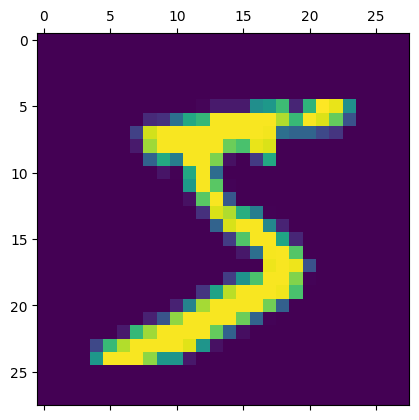

In [19]:
plt.figure(figsize=(4,4))
plt.matshow(x_train[0])
plt.show()

In [20]:
y_train[0]

np.uint8(5)

In [21]:
#We have to flatten the input array
#We can flatten it during the model formation but here we will use the reshape function

In [22]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

In [23]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [24]:
x_train[0]
#Therefor we have successfully flattened the 2d array into 1D array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [25]:
#Creating a neural network

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')
])


In [31]:
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8880 - loss: 5.3868
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8884 - loss: 5.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8907 - loss: 5.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8908 - loss: 5.0938
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8918 - loss: 5.1297


In [34]:
model.evaluate(x_test,y_test, verbose = 2)

313/313 - 1s - 4ms/step - accuracy: 0.8957 - loss: 5.7537


[5.753680229187012, 0.8956999778747559]

In [35]:
#The accuracies are fairly equal and decent 
#But lets try the accuracies by scaling the parameters between 0 and 1

In [36]:
x_train_sc = x_train/255
x_test_sc = x_test/255

In [84]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape =(784,),activation='relu'),
    keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')
])
#We first tried with only 1 hidden layer
#Now we have used 2 hidden layers to check if the accuracy is enhanced or not

C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(x_train_sc,y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9315 - loss: 0.2462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9313 - loss: 0.2487
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9337 - loss: 0.2416
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9326 - loss: 0.2403
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9325 - loss: 0.2459


In [87]:
model.evaluate(x_test_sc,y_test, verbose = 2)

313/313 - 1s - 5ms/step - accuracy: 0.9271 - loss: 0.2656


[0.26561808586120605, 0.9271000027656555]

In [88]:
#We have a fairly good accuracy 

In [89]:
#We can also use the CNN techniques but in the next project session :)))

In [90]:
y_pred = model.predict(x_test_sc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [91]:
y_pred

array([[4.6825709e-04, 2.3891293e-09, 3.0440604e-03, ..., 9.9988139e-01,
        7.2199643e-02, 5.2172875e-01],
       [9.8378494e-02, 3.1843311e-03, 9.9980760e-01, ..., 6.3191487e-18,
        2.5248608e-02, 8.1441320e-15],
       [6.5056636e-05, 9.9490315e-01, 7.4119377e-01, ..., 9.2029804e-03,
        3.0716738e-01, 2.0158300e-02],
       ...,
       [2.2869980e-07, 2.1099777e-07, 4.4240439e-04, ..., 1.8669869e-01,
        6.4479649e-01, 5.7385147e-01],
       [1.3031537e-06, 1.1855311e-05, 5.0003182e-06, ..., 5.7229140e-06,
        5.6987566e-01, 2.1357996e-06],
       [6.2247920e-05, 2.4916011e-12, 7.2500892e-02, ..., 6.0852670e-14,
        3.4940203e-06, 5.4349208e-10]], shape=(10000, 10), dtype=float32)

In [92]:
np.argmax(y_pred[0])

np.int64(7)

In [93]:
y_pred.shape

(10000, 10)

In [94]:
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [95]:
#We can now get an confusion matrix 

In [96]:
dickhead = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted)

<function matplotlib.pyplot.show(close=None, block=None)>

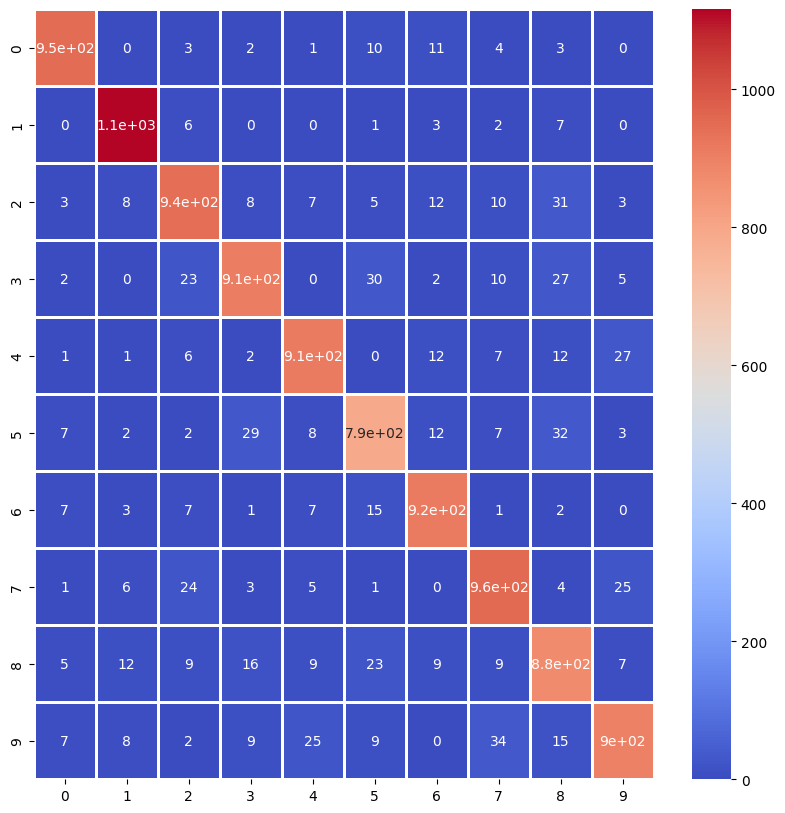

In [97]:
plt.figure(figsize =(10,10))
sns.heatmap(dickhead, annot = True, linewidth = 2, linecolor = 'white', cmap = 'coolwarm')
plt.show

In [99]:
#The diagonal elements display our accurate results whereas the other coordinates shows the inaccuracies in our model

In [100]:
#We can do other Hyperparameter Tuning to get a better accuracy but one has to make sure that the model doesnt overfit or underfit the training dataset